In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression


In [18]:
# Define the problem and goals
problem = "Crop yield prediction"
stakeholders = ["Farmers", "Agricultural companies"]
success_criteria = "Predict crop yields with an accuracy of at least 80%"

In [19]:
# Load the dataset
crop_data = pd.read_csv("datafile (1).csv")
#checking the head of the data
crop_data.head()

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72


In [4]:
#checking the null values
crop_data.isnull().sum()

Crop                                     0
State                                    0
Cost of Cultivation (`/Hectare) A2+FL    0
Cost of Cultivation (`/Hectare) C2       0
Cost of Production (`/Quintal) C2        0
Yield (Quintal/ Hectare)                 0
dtype: int64

In [5]:
#check the info of the data
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   49 non-null     object 
 1   State                                  49 non-null     object 
 2   Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 3   Cost of Cultivation (`/Hectare) C2     49 non-null     float64
 4   Cost of Production (`/Quintal) C2      49 non-null     float64
 5   Yield (Quintal/ Hectare)               49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB


In [6]:
#chekcking the statistical measures
crop_data.describe()

,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
count,49.000000,49.000000,49.000000,49.000000
mean,20363.537347,31364.666735,1620.537755,98.086735
std,13561.435306,20095.783569,1104.990472,245.293123
min,5483.540000,7868.640000,85.790000,1.320000
25%,12774.410000,19259.840000,732.620000,9.590000
50%,17022.000000,25909.050000,1595.560000,13.700000
75%,24731.060000,35423.480000,2228.970000,36.610000
max,66335.060000,91442.630000,5777.480000,1015.450000


In [9]:
#check the categorical features 
crop_data.select_dtypes(include=['object']).columns

Index(['Crop', 'State'], dtype='object')

In [10]:
#convert the Crop and State columns into numeric
crop_data['Crop'] = crop_data['Crop'].astype('category')

In [11]:
#check the categorical features
crop_data.select_dtypes(include=['object']).columns

Index(['State'], dtype='object')

In [12]:
#convert the State column into numeric
crop_data['State'] = crop_data['State'].astype('category')

In [14]:
#check the categorical features
crop_data.select_dtypes(include=['object']).columns

Index([], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   49 non-null     object 
 1   State                                  49 non-null     object 
 2   Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 3   Cost of Cultivation (`/Hectare) C2     49 non-null     float64
 4   Cost of Production (`/Quintal) C2      49 non-null     float64
 5   Yield (Quintal/ Hectare)               49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB


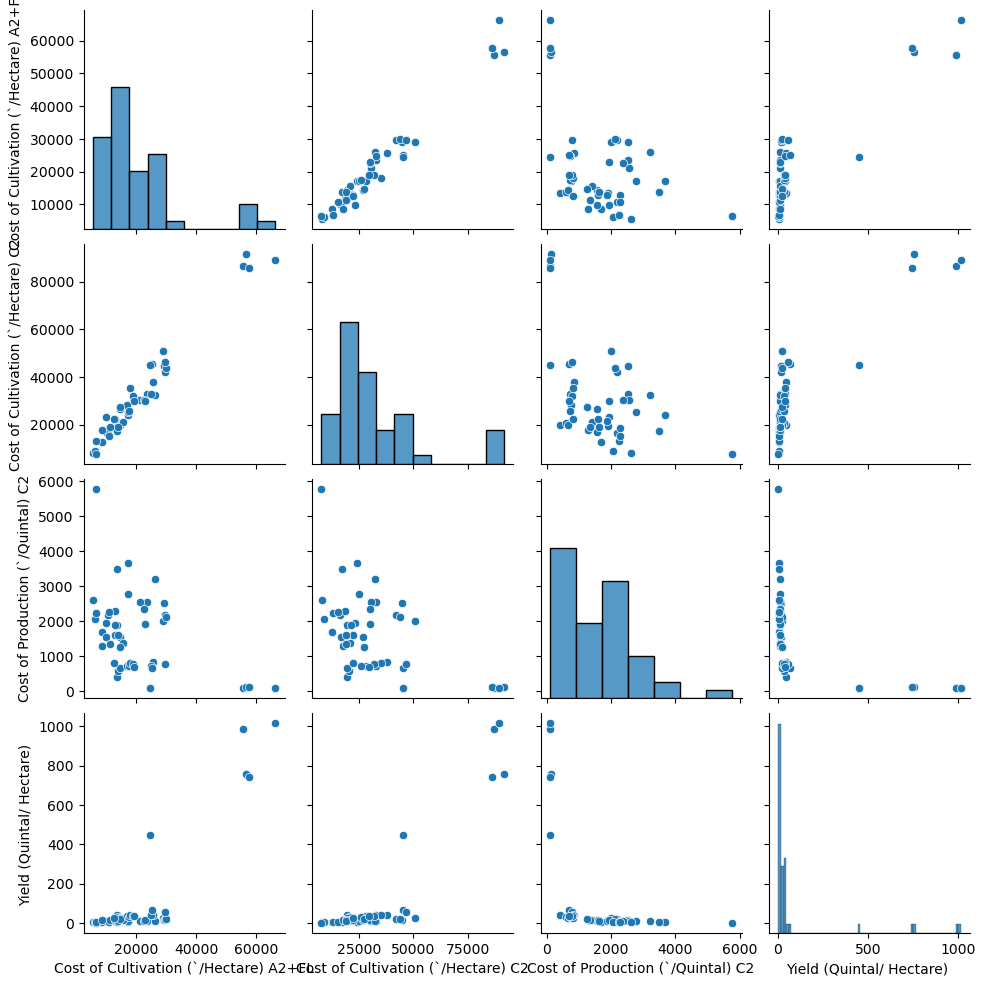

In [20]:
# Explore and analyze the data
crop_data.info()
sns.pairplot(crop_data)
plt.show()

In [23]:
crop_data.columns

Index(['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) '],
      dtype='object')

In [24]:
# Perform data preprocessing and feature engineering
cat_cols = ["Crop", "State"]
num_cols = ["Cost of Cultivation (`/Hectare) A2+FL", "Cost of Cultivation (`/Hectare) C2", "Cost of Production (`/Quintal) C2"]
target_col = "Yield (Quintal/ Hectare) "
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(), cat_cols),
    ("scaler", StandardScaler(), num_cols)
])
X = preprocessor.fit_transform(crop_data.drop(target_col, axis=1))
y = crop_data[target_col]
selector = SelectKBest(f_regression, k=3)
X_new = selector.fit_transform(X, y)


In [25]:
# Select the appropriate machine learning model
model = LinearRegression()


In [26]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)


In [27]:
# Train the machine learning model
model.fit(X_train, y_train)


LinearRegression()

In [28]:
# Evaluate the performance of the machine learning model
y_pred = model.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Squared Error: 5060.484950670993
Root Mean Squared Error: 71.13708562115117
R-squared: 0.9439825202334069


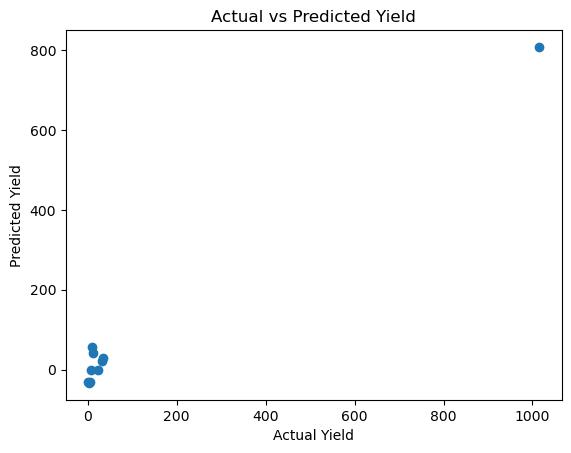

In [30]:
#plot a graph between the actual and predicted values
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.show()

In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [33]:
# Load the dataset
crop_data = pd.read_csv("datafile (2).csv")
crop_data.head()

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Area 2006-07,Area 2007-08,Area 2008-09,Area 2009-10,Area 2010-11,Yield 2006-07,Yield 2007-08,Yield 2008-09,Yield 2009-10,Yield 2010-11
0,Total Foodgrains,158.8,168.6,171.3,159.4,178.9,128.5,128.8,127.6,126.0,131.7,123.6,130.9,134.3,126.5,135.9
1,Rice,200.8,207.9,213.3,191.6,206.4,168.5,168.9,175.1,161.2,164.8,119.2,123.1,121.8,118.9,125.2
2,Wheat,131.6,136.4,140.1,140.3,150.8,115.0,115.2,114.0,116.9,119.5,114.4,118.4,122.8,120.0,126.3
3,Jowar,124.3,137.8,126.0,116.5,121.8,120.7,110.6,107.3,111.0,105.2,103.0,124.6,117.4,105.0,115.8
4,Bajra,136.4,161.5,143.9,105.4,167.9,94.5,95.1,87.0,88.5,95.6,144.3,169.7,165.4,119.0,175.8


In [34]:
# Split the dataset into features and target variable
X = crop_data.drop(["Crop", "Yield 2006-07", "Yield 2007-08", "Yield 2008-09", "Yield 2009-10", "Yield 2010-11"], axis=1)
y = crop_data["Yield 2010-11"]

In [35]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Train the random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [37]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
# Make predictions on the testing set
y_pred = rf.predict(X_test)

In [39]:
# Evaluate the performance of the random forest regressor
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 386.7932162727266
Root Mean Squared Error: 19.66705916685885
R-squared: 0.6043014739400427


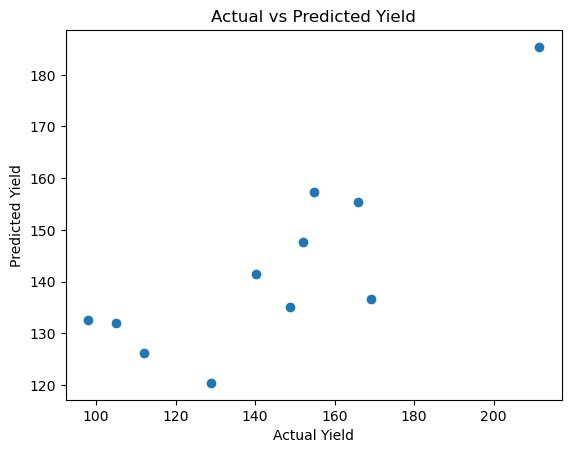

In [40]:
#plot the graph between the actual and predicted values
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.show()

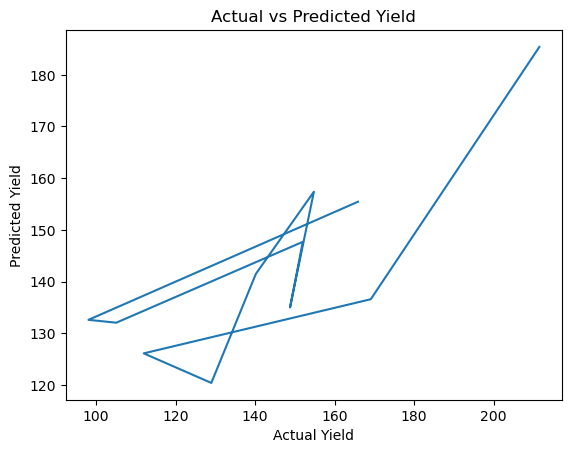

In [41]:
#plot a curve between the actual and predicted values
plt.plot(y_test,y_pred)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.show()